In [ ]:
!git clone https://github.com/UCSD-AI4H/COVID-CT.git


Cloning into 'COVID-CT'...
remote: Enumerating objects: 5463, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 5463 (delta 0), reused 1 (delta 0), pack-reused 5459
Receiving objects: 100% (5463/5463), 1.09 GiB | 30.64 MiB/s, done.
Resolving deltas: 100% (360/360), done.
Checking out files: 100% (1048/1048), done.


In [ ]:
!unzip '/content/COVID-CT/Images-processed/CT_COVID.zip'
!unzip '/content/COVID-CT/Images-processed/CT_NonCOVID.zip'

Archive:  /content/COVID-CT/Images-processed/CT_COVID.zip
   creating: CT_COVID/
  inflating: CT_COVID/2020.03.01.20029769-p21-73_1%1.png  
   creating: __MACOSX/
   creating: __MACOSX/CT_COVID/
  inflating: __MACOSX/CT_COVID/._2020.03.01.20029769-p21-73_1%1.png  
  inflating: CT_COVID/Recurrence-of-positive-SARS-CoV-2-RNA-in-C_2020_International-Journal-of-Inf-p1-21%1.png  
  inflating: __MACOSX/CT_COVID/._Recurrence-of-positive-SARS-CoV-2-RNA-in-C_2020_International-Journal-of-Inf-p1-21%1.png  
  inflating: CT_COVID/2020.03.12.20034686-p17-91-4.png  
  inflating: __MACOSX/CT_COVID/._2020.03.12.20034686-p17-91-4.png  
  inflating: CT_COVID/2020.02.25.20021568-p24-111%8.png  
  inflating: __MACOSX/CT_COVID/._2020.02.25.20021568-p24-111%8.png  
  inflating: CT_COVID/2020.03.13.20035212-p23-153.png  
  inflating: __MACOSX/CT_COVID/._2020.03.13.20035212-p23-153.png  
  inflating: CT_COVID/2020.03.21.20040691-p18-6-6.png  
  inflating: __MACOSX/CT_COVID/._2020.03.21.20040691-p18-6-6.png  


In [ ]:
import os
path='/content/CT_COVID/'
for count, filename in enumerate(os.listdir(path)): 
  dst ="covid" + str(count) + ".png"
  src =path+ filename 
  dst =path+ dst 
  os.rename(src, dst)

path='/content/CT_NonCOVID/'
for count, filename in enumerate(os.listdir(path)): 
  dst ="noncovid" + str(count) + ".png"
  src =path+ filename 
  dst =path+ dst 
  os.rename(src, dst)

In [ ]:
base_dir='/content/covid19_CT'
os.mkdir(base_dir)

In [ ]:
train_dir=os.path.join(base_dir,'train')
os.mkdir(train_dir)

validation_dir=os.path.join(base_dir,'validation')
os.mkdir(validation_dir)

# test_dir=os.path.join(base_dir,'test')
# os.mkdir(test_dir)


train_covid_dir=os.path.join(train_dir,'covid')
os.mkdir(train_covid_dir)

train_noncovid_dir=os.path.join(train_dir,'noncovid')
os.mkdir(train_noncovid_dir)


validation_covid_dir=os.path.join(validation_dir,'covid')
os.mkdir(validation_covid_dir)

validation_noncovid_dir=os.path.join(validation_dir,'noncovid')
os.mkdir(validation_noncovid_dir)

# test_covid_dir=os.path.join(test_dir,'covid')
# os.mkdir(test_covid_dir)

# test_noncovid_dir=os.path.join(test_dir,'noncovid')
# os.mkdir(test_noncovid_dir)

In [ ]:
original_dataset_dir_covid = '/content/CT_COVID/'
original_dataset_dir_non_covid = '/content/CT_NonCOVID/'

import shutil
fnames = ['covid{}.png'.format(i) for i in range(250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(train_covid_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['covid{}.png'.format(i) for i in range(250, 348)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(validation_covid_dir, fname)
    shutil.copyfile(src, dst)

# fnames = ['covid{}.png'.format(i) for i in range(300, 348)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir_covid, fname)
#     dst = os.path.join(test_covid_dir, fname)
#     shutil.copyfile(src, dst)

fnames = ['noncovid{}.png'.format(i) for i in range(250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(train_noncovid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid{}.png'.format(i) for i in range(250, 348)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(validation_noncovid_dir, fname)
    shutil.copyfile(src, dst)

# fnames = ['noncovid{}.png'.format(i) for i in range(300, 348)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir_non_covid, fname)
#     dst = os.path.join(test_noncovid_dir, fname)
#     shutil.copyfile(src, dst)


In [ ]:
print('total training Covid images:', len(os.listdir(train_covid_dir)))
print('total training NonCovid images:', len(os.listdir(train_noncovid_dir)))

print('total validation Covid images:', len(os.listdir(validation_covid_dir)))
print('total validation NonCovid images:', len(os.listdir(validation_noncovid_dir)))

# print('total test Covid images:', len(os.listdir(test_covid_dir)))
# print('total test NonCovid images:', len(os.listdir(test_noncovid_dir)))

total training Covid images: 250
total training NonCovid images: 250
total validation Covid images: 98
total validation NonCovid images: 98


In [ ]:
# creating a model
from keras import layers
from keras import models
  
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# normalizing the input from [0,255] to [0,1] and create batches from dir 
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=10,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode='binary')

history = model.fit(train_generator,
                              steps_per_epoch=50,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=10)

Found 500 images belonging to 2 classes.
Found 196 images belonging to 2 classes.
Epoch 1/20
50/50 [==============================] - 31s 602ms/step - loss: 0.6984 - acc: 0.5280 - val_loss: 0.6816 - val_acc: 0.5900
Epoch 2/20
50/50 [==============================] - 30s 608ms/step - loss: 0.6786 - acc: 0.5800 - val_loss: 0.6591 - val_acc: 0.5800
Epoch 3/20
50/50 [==============================] - 28s 562ms/step - loss: 0.6409 - acc: 0.6440 - val_loss: 0.6230 - val_acc: 0.6800
Epoch 4/20
50/50 [==============================] - 28s 551ms/step - loss: 0.6174 - acc: 0.6540 - val_loss: 0.6226 - val_acc: 0.6800
Epoch 5/20
50/50 [==============================] - 28s 564ms/step - loss: 0.5734 - acc: 0.7020 - val_loss: 0.5925 - val_acc: 0.6900
Epoch 6/20
50/50 [==============================] - 29s 582ms/step - loss: 0.4860 - acc: 0.7820 - val_loss: 0.5303 - val_acc: 0.7600
Epoch 7/20
50/50 [==============================] - 28s 559ms/step - loss: 0.4403 - acc: 0.7860 - val_loss: 0.5628 - val

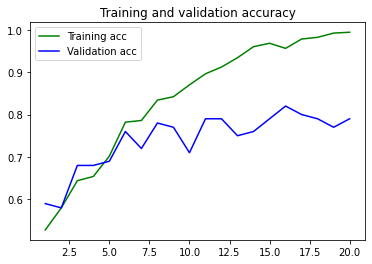

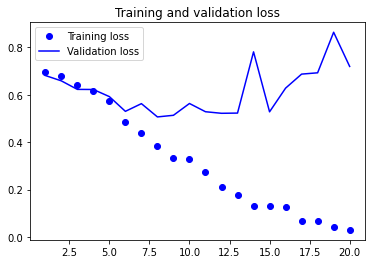

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'green', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Model-2 removing overfitting

In [ ]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dropout(0.8))
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=10,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode='binary')
start=time.time()
history = model1.fit(train_generator,
                              steps_per_epoch=50,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=10)
stop=time.time()
print(stop-start)

Found 500 images belonging to 2 classes.
Found 196 images belonging to 2 classes.
Epoch 1/20
50/50 [==============================] - 45s 735ms/step - loss: 0.6985 - acc: 0.5240 - val_loss: 0.6864 - val_acc: 0.5900
Epoch 2/20
50/50 [==============================] - 30s 591ms/step - loss: 0.6922 - acc: 0.5180 - val_loss: 0.6870 - val_acc: 0.5200
Epoch 3/20
50/50 [==============================] - 28s 554ms/step - loss: 0.6897 - acc: 0.5320 - val_loss: 0.6748 - val_acc: 0.5700
Epoch 4/20
50/50 [==============================] - 29s 569ms/step - loss: 0.6758 - acc: 0.5760 - val_loss: 0.6676 - val_acc: 0.5300
Epoch 5/20
50/50 [==============================] - 29s 582ms/step - loss: 0.6732 - acc: 0.5400 - val_loss: 0.6634 - val_acc: 0.5800
Epoch 6/20
50/50 [==============================] - 29s 583ms/step - loss: 0.6561 - acc: 0.5700 - val_loss: 0.6474 - val_acc: 0.6600
Epoch 7/20
50/50 [==============================] - 28s 566ms/step - loss: 0.6268 - acc: 0.6360 - val_loss: 0.6338 - val

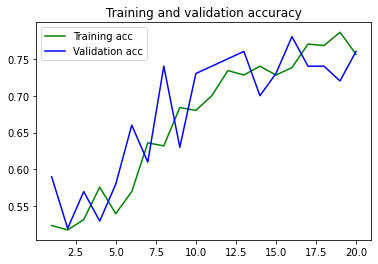

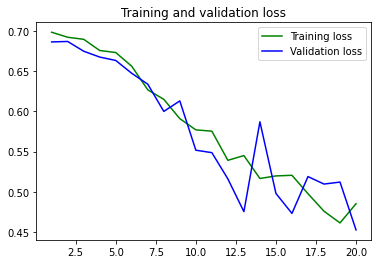

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'green', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'green', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#Changes in Activation functions

In [ ]:
#version-1
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.8))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='softmax'))

model2.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=10,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode='binary')
start=time.time()
history = model2.fit_generator(train_generator,
                              steps_per_epoch=50,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=10)
stop=time.time()
print(stop-start)

Found 500 images belonging to 2 classes.
Found 196 images belonging to 2 classes.
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


50/50 [==============================] - 28s 557ms/step - loss: 0.7018 - acc: 0.5000 - val_loss: 0.6885 - val_acc: 0.5200
Epoch 2/20
50/50 [==============================] - 27s 550ms/step - loss: 0.6967 - acc: 0.5000 - val_loss: 0.6747 - val_acc: 0.4600
Epoch 3/20
50/50 [==============================] - 28s 553ms/step - loss: 0.6884 - acc: 0.5000 - val_loss: 0.6776 - val_acc: 0.5600
Epoch 4/20
50/50 [==============================] - 28s 549ms/step - loss: 0.6805 - acc: 0.5000 - val_loss: 0.6527 - val_acc: 0.5900
Epoch 5/20
50/50 [==============================] - 28s 566ms/step - loss: 0.6727 - acc: 0.5000 - val_loss: 0.6560 - val_acc: 0.5200
Epoch 6/20
50/50 [==============================] - 30s 590ms/step - loss: 0.6525 - acc: 0.5000 - val_loss: 0.6261 - val_acc: 0.5200
Epoch 7/20
50/50 [==============================] - 28s 549ms/step - loss: 0.6436 - acc: 0.5000 - val_loss: 0.6364 - val_acc: 0.4900
Epoch 8/20
50/50 [==============================] - 28s 552ms/step - loss: 0.634

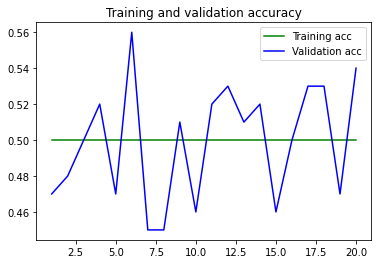

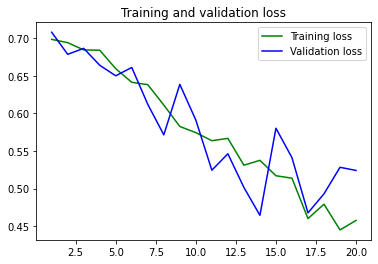

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'green', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'green', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#version-2
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(150, 150, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='sigmoid'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='sigmoid'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dropout(0.8))
model3.add(layers.Dense(512, activation='sigmoid'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
import time
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=10,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode='binary')
start=time.time()
history = model3.fit(train_generator,
                              steps_per_epoch=50,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=10)
stop=time.time()
print(stop-start)

Found 500 images belonging to 2 classes.
Found 196 images belonging to 2 classes.
Epoch 1/20
50/50 [==============================] - 29s 578ms/step - loss: 0.7136 - acc: 0.5140 - val_loss: 0.7616 - val_acc: 0.5300
Epoch 2/20
50/50 [==============================] - 31s 622ms/step - loss: 0.7382 - acc: 0.4720 - val_loss: 0.6934 - val_acc: 0.4900
Epoch 3/20
50/50 [==============================] - 30s 591ms/step - loss: 0.7349 - acc: 0.5000 - val_loss: 0.6887 - val_acc: 0.5600
Epoch 4/20
50/50 [==============================] - 32s 635ms/step - loss: 0.7456 - acc: 0.4480 - val_loss: 0.6899 - val_acc: 0.5400
Epoch 5/20
50/50 [==============================] - 30s 592ms/step - loss: 0.7246 - acc: 0.4840 - val_loss: 0.6972 - val_acc: 0.5300
Epoch 6/20
50/50 [==============================] - 31s 619ms/step - loss: 0.7546 - acc: 0.4940 - val_loss: 0.8445 - val_acc: 0.4700
Epoch 7/20
50/50 [==============================] - 30s 591ms/step - loss: 0.7351 - acc: 0.4820 - val_loss: 0.7424 - val

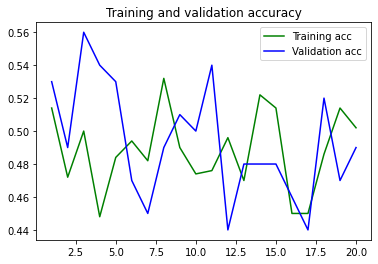

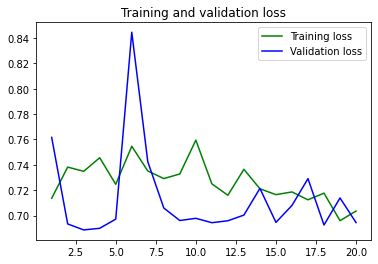

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'green', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'green', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#version-3
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(150, 150, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='sigmoid'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='sigmoid'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dropout(0.8))
model4.add(layers.Dense(512, activation='sigmoid'))
model4.add(layers.Dense(1, activation='softmax'))

model4.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=10,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode='binary')

Found 500 images belonging to 2 classes.
Found 196 images belonging to 2 classes.


In [ ]:
start=time.time()
history = model4.fit(train_generator,
                              steps_per_epoch=50,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=10)
stop=time.time()
print(stop-start)

Epoch 1/20
50/50 [==============================] - 30s 593ms/step - loss: 0.7736 - acc: 0.5000 - val_loss: 0.9847 - val_acc: 0.4900
Epoch 2/20
50/50 [==============================] - 31s 627ms/step - loss: 0.7499 - acc: 0.5000 - val_loss: 0.6912 - val_acc: 0.5400
Epoch 3/20
50/50 [==============================] - 29s 588ms/step - loss: 0.7374 - acc: 0.5000 - val_loss: 0.7230 - val_acc: 0.4200
Epoch 4/20
50/50 [==============================] - 38s 754ms/step - loss: 0.7418 - acc: 0.5000 - val_loss: 0.6986 - val_acc: 0.4900
Epoch 5/20
50/50 [==============================] - 38s 757ms/step - loss: 0.7482 - acc: 0.5000 - val_loss: 0.6860 - val_acc: 0.4400
Epoch 6/20
50/50 [==============================] - 39s 771ms/step - loss: 0.7348 - acc: 0.5000 - val_loss: 0.6995 - val_acc: 0.4500
Epoch 7/20
50/50 [==============================] - 32s 639ms/step - loss: 0.7183 - acc: 0.5000 - val_loss: 0.7104 - val_acc: 0.4700
Epoch 8/20
50/50 [==============================] - 30s 593ms/step - 

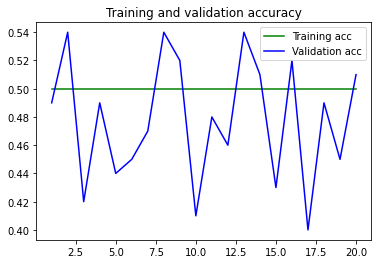

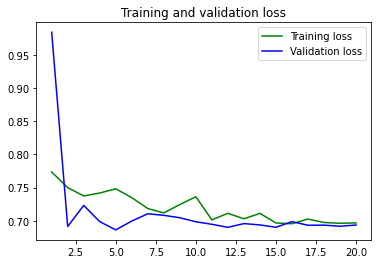

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'green', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'green', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#version-5
model5 = models.Sequential()
model5.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(150, 150, 3)))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Flatten())
model5.add(layers.Dropout(0.8))
model5.add(layers.Dense(512, activation='tanh'))
model5.add(layers.Dense(1, activation='sigmoid'))
 
model5.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=10,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode='binary')
start=time.time()
history = model5.fit(train_generator,
                              steps_per_epoch=50,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=10)
stop=time.time()
print(stop-start)

Found 500 images belonging to 2 classes.
Found 196 images belonging to 2 classes.
Epoch 1/20
50/50 [==============================] - 30s 585ms/step - loss: 0.7370 - acc: 0.4880 - val_loss: 0.7130 - val_acc: 0.5600
Epoch 2/20
50/50 [==============================] - 30s 602ms/step - loss: 0.7067 - acc: 0.5480 - val_loss: 0.6377 - val_acc: 0.7100
Epoch 3/20
50/50 [==============================] - 31s 613ms/step - loss: 0.6717 - acc: 0.5880 - val_loss: 0.6612 - val_acc: 0.5700
Epoch 4/20
50/50 [==============================] - 29s 589ms/step - loss: 0.6366 - acc: 0.5920 - val_loss: 0.6190 - val_acc: 0.6700
Epoch 5/20
50/50 [==============================] - 29s 580ms/step - loss: 0.6367 - acc: 0.6380 - val_loss: 0.6083 - val_acc: 0.6800
Epoch 6/20
50/50 [==============================] - 31s 613ms/step - loss: 0.6089 - acc: 0.6540 - val_loss: 0.6110 - val_acc: 0.7200
Epoch 7/20
50/50 [==============================] - 29s 585ms/step - loss: 0.5591 - acc: 0.7180 - val_loss: 0.6542 - val

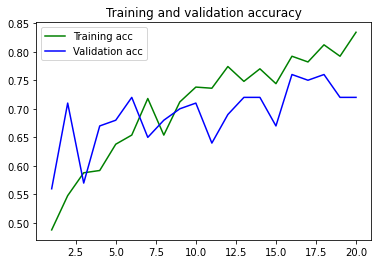

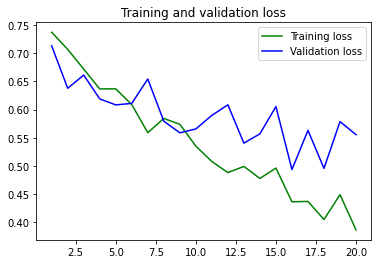

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'green', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'green', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#version-6
model6 = models.Sequential()
model6.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(150, 150, 3)))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Flatten())
model6.add(layers.Dropout(0.8))
model6.add(layers.Dense(512, activation='tanh'))
model6.add(layers.Dense(1, activation='softmax'))

model6.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=10,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode='binary')
start=time.time()
history = model6.fit(train_generator,
                              steps_per_epoch=50,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=10)
stop=time.time()
print(stop-start)

Found 500 images belonging to 2 classes.
Found 196 images belonging to 2 classes.
Epoch 1/20
50/50 [==============================] - 31s 601ms/step - loss: 0.7336 - acc: 0.5000 - val_loss: 0.6723 - val_acc: 0.5100
Epoch 2/20
50/50 [==============================] - 31s 619ms/step - loss: 0.6923 - acc: 0.5000 - val_loss: 0.6449 - val_acc: 0.5200
Epoch 3/20
50/50 [==============================] - 30s 595ms/step - loss: 0.6600 - acc: 0.5000 - val_loss: 0.6635 - val_acc: 0.4900
Epoch 4/20
50/50 [==============================] - 29s 586ms/step - loss: 0.6339 - acc: 0.5000 - val_loss: 0.5870 - val_acc: 0.4700
Epoch 5/20
50/50 [==============================] - 29s 588ms/step - loss: 0.6172 - acc: 0.5000 - val_loss: 0.5836 - val_acc: 0.4400
Epoch 6/20
50/50 [==============================] - 29s 584ms/step - loss: 0.6150 - acc: 0.5000 - val_loss: 0.7094 - val_acc: 0.4800
Epoch 7/20
50/50 [==============================] - 30s 597ms/step - loss: 0.5929 - acc: 0.5000 - val_loss: 0.6166 - val

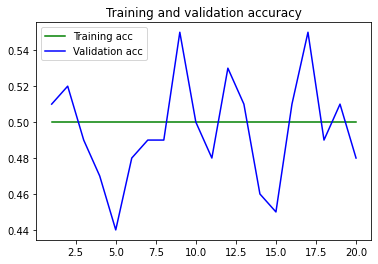

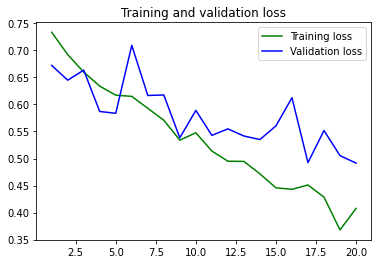

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'green', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'green', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
import time

model7 = models.Sequential()
model7.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Conv2D(64, (3, 3), activation='relu'))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Conv2D(128, (3, 3), activation='relu'))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Conv2D(128, (3, 3), activation='relu'))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Conv2D(128, (3, 3), activation='relu'))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Flatten())
model7.add(layers.Dropout(0.8))
model7.add(layers.Dense(512, activation='relu'))
model7.add(layers.Dense(1, activation='sigmoid'))
model7.summary()

from tensorflow.keras import optimizers
model7.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=10,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode='binary')
start=time.time()
history = model7.fit(train_generator,
                              steps_per_epoch=50,
                              epochs=40,
                              validation_data=validation_generator,
                              validation_steps=10)
stop=time.time()
print(stop-start)

Found 500 images belonging to 2 classes.
Found 196 images belonging to 2 classes.
Epoch 1/40
50/50 [==============================] - 27s 548ms/step - loss: 0.6941 - acc: 0.5060 - val_loss: 0.6929 - val_acc: 0.5000
Epoch 2/40
50/50 [==============================] - 27s 538ms/step - loss: 0.6988 - acc: 0.4720 - val_loss: 0.6912 - val_acc: 0.5400
Epoch 3/40
50/50 [==============================] - 27s 541ms/step - loss: 0.6974 - acc: 0.4760 - val_loss: 0.6923 - val_acc: 0.5500
Epoch 4/40
50/50 [==============================] - 28s 563ms/step - loss: 0.6963 - acc: 0.4780 - val_loss: 0.6911 - val_acc: 0.6800
Epoch 5/40
50/50 [==============================] - 27s 541ms/step - loss: 0.6915 - acc: 0.5340 - val_loss: 0.6899 - val_acc: 0.5100
Epoch 6/40
50/50 [==============================] - 27s 538ms/step - loss: 0.6940 - acc: 0.4880 - val_loss: 0.6910 - val_acc: 0.5200
Epoch 7/40
50/50 [==============================] - 28s 565ms/step - loss: 0.6927 - acc: 0.5200 - val_loss: 0.6858 - val

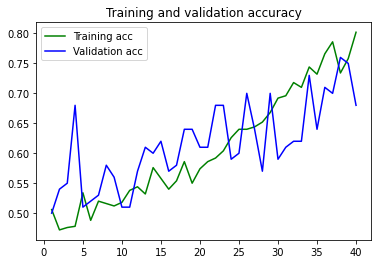

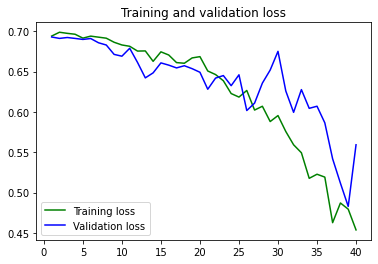

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'green', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'green', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:


model8 = models.Sequential()
model8.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model8.add(layers.MaxPooling2D((2, 2)))
model8.add(layers.Conv2D(64, (3, 3), activation='relu'))
model8.add(layers.MaxPooling2D((2, 2)))
model8.add(layers.Conv2D(128, (3, 3), activation='relu'))
model8.add(layers.MaxPooling2D((2, 2)))
model8.add(layers.Conv2D(128, (3, 3), activation='relu'))
model8.add(layers.MaxPooling2D((2, 2)))
model8.add(layers.Flatten())
model8.add(layers.Dropout(0.7))
model8.add(layers.Dense(512, activation='relu'))
model8.add(layers.Dense(1, activation='sigmoid'))

from tensorflow.keras import optimizers
model8.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=10,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode='binary')
start=time.time()
history = model8.fit(train_generator,
                              steps_per_epoch=50,
                              epochs=35,
                              validation_data=validation_generator,
                              validation_steps=10)
stop=time.time()
print(stop-start)

Found 500 images belonging to 2 classes.
Found 196 images belonging to 2 classes.
Epoch 1/35
50/50 [==============================] - 32s 613ms/step - loss: 0.6983 - acc: 0.5000 - val_loss: 0.6902 - val_acc: 0.4900
Epoch 2/35
50/50 [==============================] - 28s 563ms/step - loss: 0.6861 - acc: 0.5400 - val_loss: 0.7114 - val_acc: 0.4300
Epoch 3/35
50/50 [==============================] - 28s 555ms/step - loss: 0.6809 - acc: 0.5420 - val_loss: 0.6771 - val_acc: 0.5400
Epoch 4/35
50/50 [==============================] - 29s 568ms/step - loss: 0.6581 - acc: 0.5780 - val_loss: 0.6234 - val_acc: 0.5900
Epoch 5/35
50/50 [==============================] - 28s 565ms/step - loss: 0.6496 - acc: 0.6040 - val_loss: 0.5938 - val_acc: 0.6800
Epoch 6/35
50/50 [==============================] - 28s 555ms/step - loss: 0.6392 - acc: 0.6120 - val_loss: 0.5884 - val_acc: 0.6800
Epoch 7/35
50/50 [==============================] - 28s 561ms/step - loss: 0.6027 - acc: 0.6660 - val_loss: 0.6044 - val

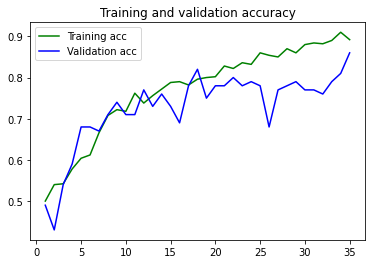

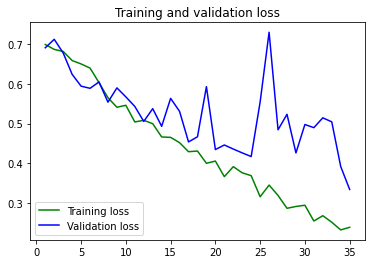

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'green', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'green', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model9 = models.Sequential()
model9.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(150, 150, 3)))
model9.add(layers.MaxPooling2D((2, 2)))
model9.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model9.add(layers.MaxPooling2D((2, 2)))
model9.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model9.add(layers.MaxPooling2D((2, 2)))
model9.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model9.add(layers.MaxPooling2D((2, 2)))
model9.add(layers.Flatten())
model9.add(layers.Dropout(0.7))
model9.add(layers.Dense(512, activation='tanh'))
model9.add(layers.Dense(1, activation='sigmoid'))

from tensorflow.keras import optimizers
model9.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=10,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode='binary')
start=time.time()
history = model9.fit(train_generator,
                              steps_per_epoch=50,
                              epochs=35,
                              validation_data=validation_generator,
                              validation_steps=10)
stop=time.time()
print(stop-start)

Found 500 images belonging to 2 classes.
Found 196 images belonging to 2 classes.
Epoch 1/35
50/50 [==============================] - 32s 621ms/step - loss: 0.7563 - acc: 0.5200 - val_loss: 0.6620 - val_acc: 0.5900
Epoch 2/35
50/50 [==============================] - 30s 597ms/step - loss: 0.6701 - acc: 0.6100 - val_loss: 0.6371 - val_acc: 0.5900
Epoch 3/35
50/50 [==============================] - 29s 580ms/step - loss: 0.6155 - acc: 0.6700 - val_loss: 0.6605 - val_acc: 0.6100
Epoch 4/35
50/50 [==============================] - 30s 606ms/step - loss: 0.6206 - acc: 0.6380 - val_loss: 0.6421 - val_acc: 0.6300
Epoch 5/35
50/50 [==============================] - 30s 595ms/step - loss: 0.5866 - acc: 0.7020 - val_loss: 0.6126 - val_acc: 0.6700
Epoch 6/35
50/50 [==============================] - 30s 592ms/step - loss: 0.5770 - acc: 0.7140 - val_loss: 0.5892 - val_acc: 0.6600
Epoch 7/35
50/50 [==============================] - 31s 611ms/step - loss: 0.5673 - acc: 0.6820 - val_loss: 0.5934 - val

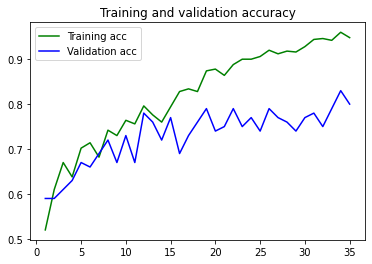

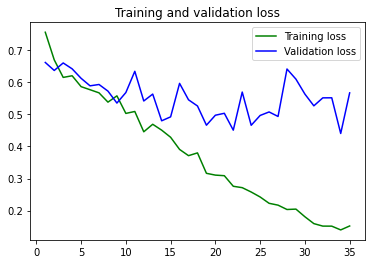

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'green', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'green', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model10 = models.Sequential()
model10.add(layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(150, 150, 3)))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Conv2D(128, (3, 3), activation='sigmoid'))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Conv2D(128, (3, 3), activation='sigmoid'))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Flatten())
model10.add(layers.Dropout(0.7))
model10.add(layers.Dense(512, activation='sigmoid'))
model10.add(layers.Dense(1, activation='sigmoid'))

from tensorflow.keras import optimizers
model10.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=10,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode='binary')
start=time.time()
history = model10.fit(train_generator,
                              steps_per_epoch=50,
                              epochs=35,
                              validation_data=validation_generator,
                              validation_steps=10)
stop=time.time()
print(stop-start)

Found 500 images belonging to 2 classes.
Found 196 images belonging to 2 classes.
Epoch 1/35
50/50 [==============================] - 30s 582ms/step - loss: 0.7381 - acc: 0.5160 - val_loss: 0.7196 - val_acc: 0.4800
Epoch 2/35
50/50 [==============================] - 31s 615ms/step - loss: 0.7057 - acc: 0.5300 - val_loss: 0.6940 - val_acc: 0.5400
Epoch 3/35
50/50 [==============================] - 29s 576ms/step - loss: 0.7352 - acc: 0.4960 - val_loss: 0.6877 - val_acc: 0.5600
Epoch 4/35
50/50 [==============================] - 30s 603ms/step - loss: 0.7229 - acc: 0.4780 - val_loss: 0.6944 - val_acc: 0.5100
Epoch 5/35
50/50 [==============================] - 30s 598ms/step - loss: 0.7271 - acc: 0.4740 - val_loss: 0.6997 - val_acc: 0.4800
Epoch 6/35
50/50 [==============================] - 30s 603ms/step - loss: 0.7242 - acc: 0.4800 - val_loss: 0.7073 - val_acc: 0.4900
Epoch 7/35
50/50 [==============================] - 29s 580ms/step - loss: 0.7377 - acc: 0.5000 - val_loss: 0.7251 - val

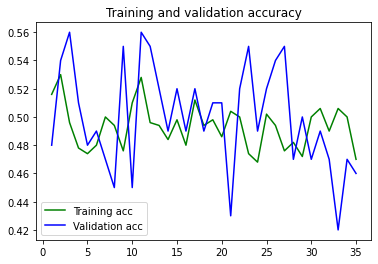

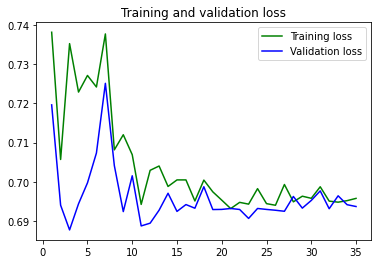

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'green', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'green', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()